## Statistics for Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

### Simple linear regression

In [4]:
import yfinance as yf
netflix = yf.Ticker("NFLX")
start = "2016-01-01"
end = "2018-01-01"
df = netflix.history(interval="1d",start = start,end = end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-12-31,116.209999,117.459999,114.279999,114.379997,9273000,0,0
2016-01-04,109.000000,110.000000,105.209999,109.959999,20794800,0,0
2016-01-05,110.449997,110.580002,105.849998,107.660004,17664600,0,0
2016-01-06,105.290001,117.910004,104.959999,117.680000,33045700,0,0
2016-01-07,116.360001,122.180000,112.290001,114.559998,33636700,0,0
...,...,...,...,...,...,...,...
2017-12-22,188.330002,190.949997,186.800003,189.940002,3878900,0,0
2017-12-26,189.779999,189.940002,186.399994,187.759995,3045700,0,0
2017-12-27,187.800003,188.100006,185.220001,186.240005,4002100,0,0


In [5]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

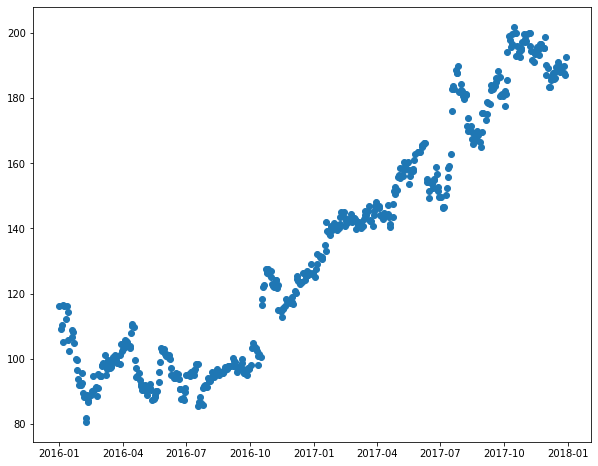

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(df.index, df["Open"]);

In [7]:
x= (df.index - df.index[0]).days.to_numpy()
y = df.Open.to_numpy()

##### LSE Linear Regression and Decomposition of Variance

In [8]:
from scipy.stats import linregress
linregress(x,y)

LinregressResult(slope=0.16145554979239535, intercept=74.52485335233823, rvalue=0.9433886780476411, pvalue=9.633385220865855e-243, stderr=0.002533622701842756)

#### coefficient of determination

In [9]:
linregress(x,y)[2]**2

0.8899821978684759

#### Total variance of dependent variables

In [10]:
np.var(y)*len(y)

654225.7772634223

654225.7772634227


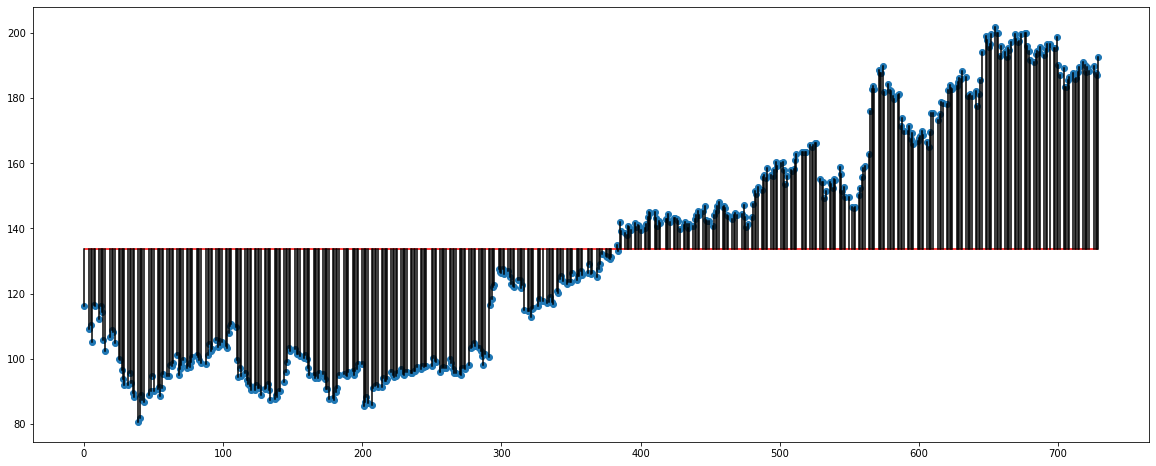

In [11]:
plt.figure(figsize=(20,8))
plt.scatter(x, y)
y_mean = np.mean(y)
plt.hlines(y_mean, np.min(x), np.max(x),color="r")
sst = 0
for x_, y_ in zip(x,y):
    plt.plot([x_,x_],[y_mean,y_],color="black",linestyle="-")
    sst += (y_ - y_mean)**2
print(sst)

In [12]:
def x_2_y(slope, x, y, x_in):
    """
    return the y value on the straight line defined by the slope and point (x,y)
    """
    return y + slope*(x_in - x)

156334.27965121696


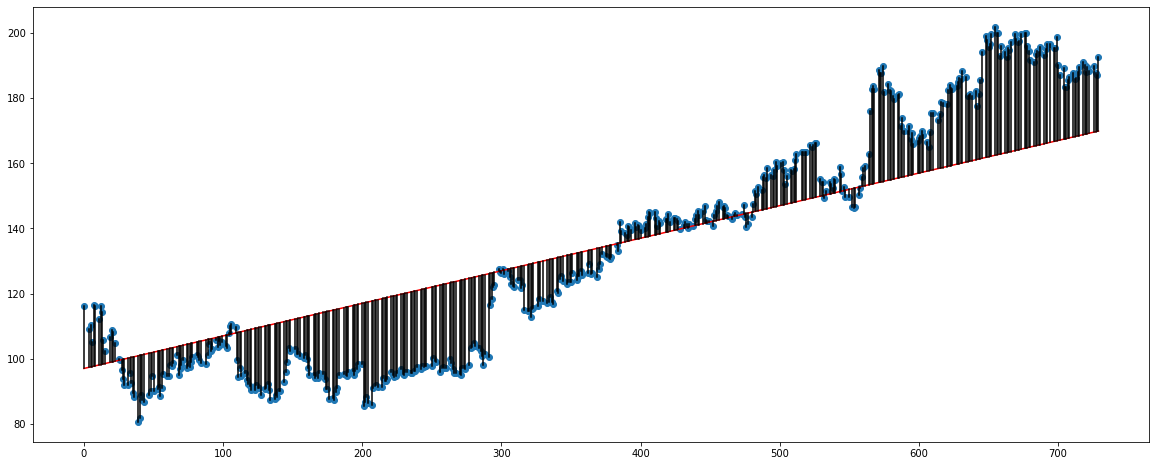

In [13]:
plt.figure(figsize=(20,8))
plt.scatter(x, y)
y_mean = np.mean(y)
x_mean = np.mean(x)
plt.plot([np.min(x),np.max(x)], 
         [x_2_y(0.1,x_mean,y_mean,np.min(x)),x_2_y(0.1,x_mean,y_mean,np.max(x)),],
         color="r")
sse = 0
for x_, y_ in zip(x,y):
    y_on_line = x_2_y(0.1,x_mean,y_mean,x_)
    plt.plot([x_,x_],[y_on_line,y_],color="black",linestyle="-")
    sse += (y_on_line - y_)**2
print(sse)

#### SSE VS slope

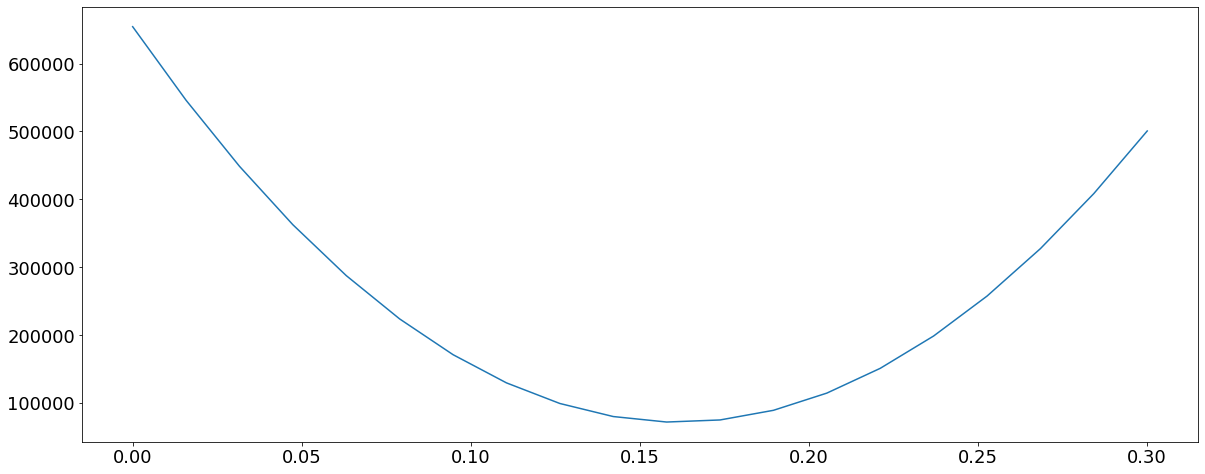

In [14]:
y_mean = np.mean(y)
x_mean = np.mean(x)
slopes = np.linspace(0,0.3,20)
sses = [0 for i in range(len(slopes))]
for x_, y_ in zip(x,y):
    for i in range(len(sses)):
        y_on_line = x_2_y(slopes[i],x_mean,y_mean,x_)
        sses[i] += (y_on_line - y_)**2

plt.figure(figsize=(20,8))
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.plot(slopes,sses);

#### 3D visualization, considering both slope and intercept

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [16]:
def cal_sse(slope,intercept, x, y):
    sse = 0
    for x_, y_ in zip(x,y):
        y_on_line = x_2_y(slope,0,intercept,x_)
        sse += (y_on_line - y_)**2
    return sse

slopes = np.linspace(-1,1,20)
intercepts = np.linspace(-200,400,20)
slopes, intercepts = np.meshgrid(slopes,intercepts)
sses = np.zeros(intercepts.shape)
for i in range(sses.shape[0]):
    for j in range(sses.shape[1]):
        sses[i][j] = cal_sse(slopes[i][j],intercepts[i][j],x,y)

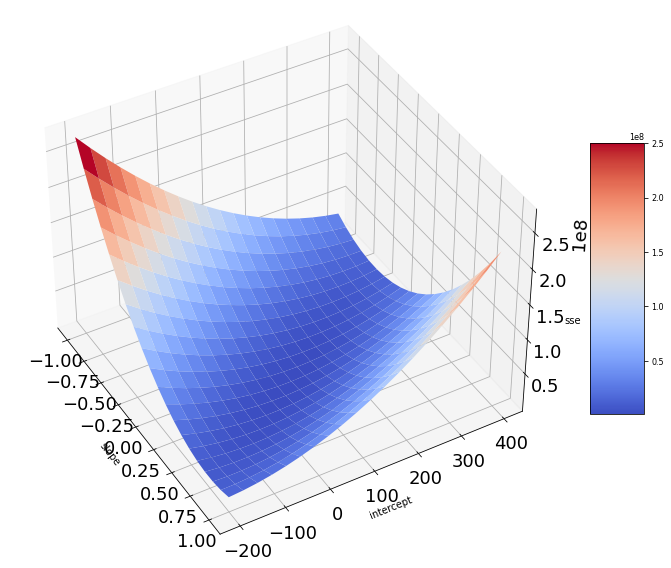

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d')
ax.view_init(40, -30)
ax.set_xlabel("slope")
ax.set_ylabel("intercept")
ax.set_zlabel("sse")
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
surf = ax.plot_surface(slopes, intercepts, sses, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

#### Notes on R^2

##### Influence of Outlier

LinregressResult(slope=2.181038442360317, intercept=0.9204244764964242, rvalue=0.5138891687655077, pvalue=0.01717156649964954, stderr=0.835279351538711)

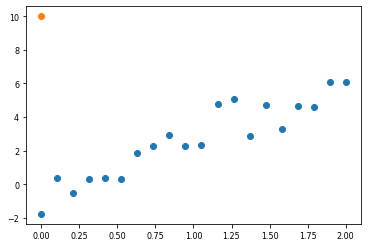

In [18]:
np.random.seed(2020)
x = np.linspace(0,2,20)
y = 3*x + np.random.normal(size=len(x))
x_new = np.append(x,np.array([0]))
y_new = np.append(y,np.array([10]))
plt.scatter(x,y)
plt.scatter([0],[10])
linregress(x_new,y_new)

LinregressResult(slope=3.413266549121516, intercept=-0.7657824064399539, rvalue=0.9340376682483343, pvalue=1.7645498128072767e-09, stderr=0.30764511604564365)

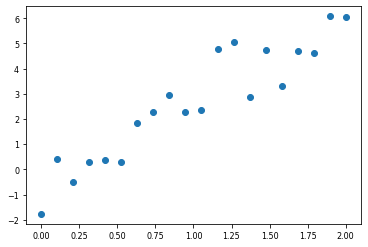

In [19]:
plt.scatter(x,y)
linregress(x,y)

#### Small R^2 may indicate you are using the wrong model from first place. 

LinregressResult(slope=0.20663327456075753, intercept=-2.909206992693661, rvalue=0.09888652796032295, pvalue=0.6783044219743989, stderr=0.4901094122156666)

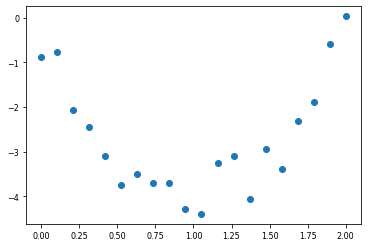

In [20]:
np.random.seed(2020)
x = np.linspace(0,2,20)
y = 4*x**2-8*x + np.random.normal(scale=0.5,size=len(x))
plt.scatter(x,y)
linregress(x,y)

### Linear Regression and Estimator

In [21]:
x= (df.index - df.index[0]).days.to_numpy()
y = df.Open.to_numpy()
x_mean = np.mean(x)
y_mean = np.mean(y)
k = np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
b = y_mean - k * x_mean
print(k,b)

0.1614555497923954 74.5248533523382


## Multivariate Linear Regression and Collinearity Analysis

In [22]:
import pandas as pd
exam = pd.read_csv("exams.csv")

In [23]:
exam.head()

,EXAM1,EXAM2,EXAM3,FINAL
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [24]:
exam["index"] = exam.index
exam_long = pd.melt(exam,id_vars=["index"],value_vars = exam.columns[:-1])[["variable","value"]]
exam_long.columns = ["exam_name","score"]

In [25]:
exam_long.sample(10)

,exam_name,score
53,EXAM3,100
56,EXAM3,77
31,EXAM2,74
57,EXAM3,60
4,EXAM1,73
67,EXAM3,93
51,EXAM3,93
95,FINAL,177
29,EXAM2,66
92,FINAL,183


##### violin-plot

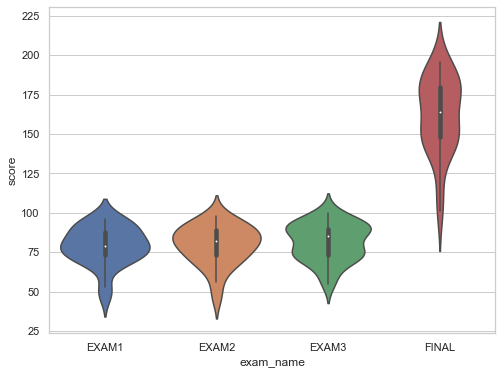

In [26]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.violinplot(x="exam_name", y="score", data=exam_long);

##### scatter plot

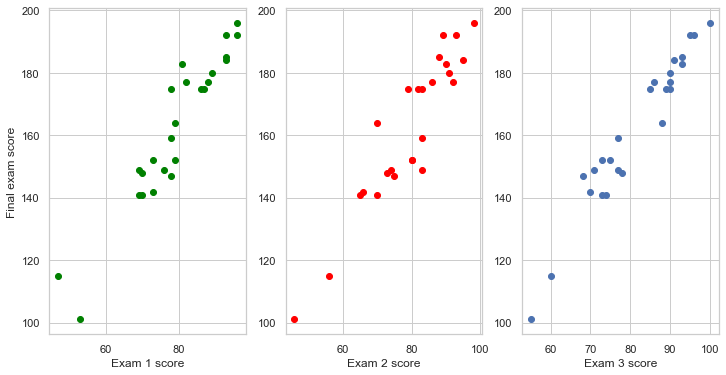

In [27]:
fig, ax = plt.subplots(1,3,figsize=(12,6))
ax[0].scatter(exam.EXAM1,exam.FINAL,color="green")
ax[1].scatter(exam.EXAM2,exam.FINAL,color="red")
ax[2].scatter(exam.EXAM3,exam.FINAL)
ax[0].set_xlabel("Exam 1 score")
ax[1].set_xlabel("Exam 2 score")
ax[2].set_xlabel("Exam 3 score")
ax[0].set_ylabel("Final exam score");

##### OLS

In [39]:
import statsmodels.api as sm
X = exam[["EXAM1","EXAM2","EXAM3"]].to_numpy()
X = sm.add_constant(X)
y = exam["FINAL"].to_numpy()
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     670.1
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           5.34e-21
Time:                        13:50:35   Log-Likelihood:                -57.312
No. Observations:                  25   AIC:                             122.6
Df Residuals:                      21   BIC:                             127.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3361      3.764     -1.152      0.262     -12.164       3.492
x1             0.3559      0.121      2.932      0.008       0.103       0.608
x2             0.5425      0.101      5.379      0.000       0.333       0.752
x3             1.1674      0.103     11.333      0.000       0.953       1.382
==============================================================================
Omnibus:                        8.219   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                6.157
Skew:                           0.993   Prob(JB):                       0.0460
Kurtosis:                       4.401   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###Covariance matrix

In [40]:
exam[["EXAM1","EXAM2","EXAM3"]].corr()

,EXAM1,EXAM2,EXAM3
EXAM1,1.000000,0.901363,0.892743
EXAM2,0.901363,1.000000,0.846359
EXAM3,0.892743,0.846359,1.000000


In [41]:
linregress(exam.EXAM1, exam.FINAL)

LinregressResult(slope=1.8524548489068682, intercept=15.621968742401123, rvalue=0.946070831810203, pvalue=9.543660489161313e-13, stderr=0.13226692073027232)

In [42]:
linregress(exam.EXAM2, exam.FINAL)

LinregressResult(slope=1.7873376969490227, intercept=19.98239984649166, rvalue=0.9294714401508717, pvalue=1.9238076314221714e-11, stderr=0.14791367676877226)

VIF calculation

In [43]:
X = exam[["EXAM2","EXAM3"]].to_numpy()
X = sm.add_constant(X)
y = exam["EXAM1"].to_numpy()
sm.OLS(y,X).fit().rsquared

0.8719071131647402

### Lasso Regression and Regularization

In [44]:
from sklearn import linear_model
X = exam[["EXAM1","EXAM2","EXAM3"]].to_numpy()
y = exam["FINAL"].to_numpy()

In [45]:
alpha = 0.1
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X,y)
lasso_regressor = linear_model.Lasso(alpha=alpha)
lasso_regressor.fit(X,y)
ridge_regressor = linear_model.Ridge(alpha=alpha*len(y)*2)
ridge_regressor.fit(X,y)
print("linear model coefficient: ", linear_regressor.coef_)
print("lasso model coefficient: ", lasso_regressor.coef_)
print("ridge model coefficient: ", ridge_regressor.coef_)

linear model coefficient:  [0.35593822 0.54251876 1.16744422]
lasso model coefficient:  [0.35537305 0.54236992 1.16735218]
ridge model coefficient:  [0.3609811  0.54233219 1.16116573]


coefficient magnitude versus regularization coefficient

In [46]:
X = exam[["EXAM1","EXAM2","EXAM3"]].to_numpy()
y = exam["FINAL"].to_numpy()
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X,y)
linear_coefficient = np.array([linear_regressor.coef_] * 20).T
lasso_coefficient = []
ridge_coefficient = []
alphas = np.linspace(1,400,20)
for alpha in alphas:
    lasso_regressor = linear_model.Lasso(alpha=alpha)
    lasso_regressor.fit(X,y)
    ridge_regressor = linear_model.Ridge(alpha=alpha*len(y)*2)
    ridge_regressor.fit(X,y)
    lasso_coefficient.append(lasso_regressor.coef_)
    ridge_coefficient.append(ridge_regressor.coef_)
lasso_coefficient = np.array(lasso_coefficient).T
ridge_coefficient = np.array(ridge_coefficient).T   

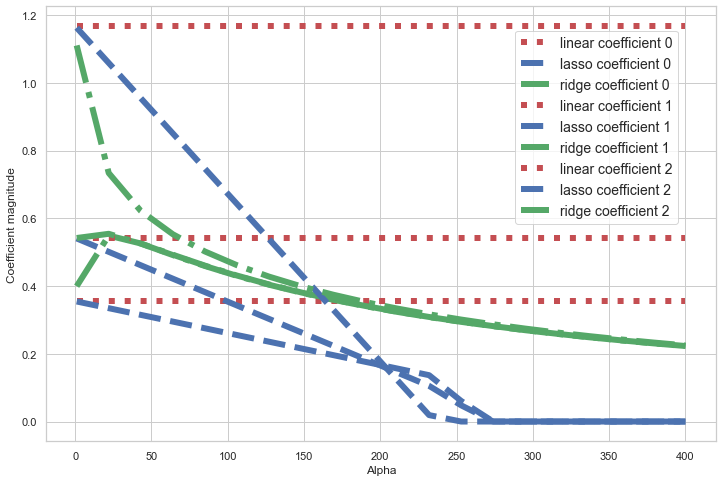

In [47]:
plt.figure(figsize=(12,8))
for i in range(3):
    plt.plot(alphas, linear_coefficient[i], label = "linear coefficient {}".format(i), 
             c="r", linestyle=":",linewidth=6)
    plt.plot(alphas, lasso_coefficient[i], label = "lasso coefficient {}".format(i), 
             c= "b",linestyle="--",linewidth=6)
    plt.plot(alphas, ridge_coefficient[i], label = "ridge coefficient {}".format(i),
             c="g",linestyle="-.",linewidth=6)
plt.legend(loc=(0.7,0.5),fontsize=14)
plt.xlabel("Alpha")
plt.ylabel("Coefficient magnitude");